In [29]:
##AUTHOR: Rose Rutherford-Stone (27062516)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import gzip
import json
import collections

#EXTRACT DATA FROM ZIP FOLDER
jsonfiledirectory = "C:\\Users\\b_malpar\\Downloads\\goemotions.json.gz"

with gzip.open(jsonfiledirectory, "r") as f:
    data = json.loads(f.read().decode("utf-8"))

#2.1
strings = []
sentiment = []
emotions =[]
for item in data:
    strings.append(item[0])
    sentiment.append(item[2])
    emotions.append(item[1])

vectorizer = CountVectorizer()
# tokenize and build vocab
v_fit = vectorizer.fit_transform(strings)

#2.2
#X_train, X_test, y_train, y_test = train_test_split(v_fit, sentiment, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(v_fit, emotions, test_size=0.2,random_state=0)


In [30]:
#2.3
#Base-MNB ~ 2.3.1
base_mnb = MultinomialNB()
base_mnb.fit(X_train,y_train)
print("Base-MNB: ")
print(base_mnb.score(X_test,y_test))

Base-MNB: 
0.38444302176696543


In [31]:
#Base-DT ~ 2.3.2
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Base-DT: ")
print(dtc.score(X_test, y_test))


Base-DT: 
0.36162844837620767


In [ ]:
#Base-MLP ~ 2.3.3
p = Perceptron()
p.fit(X_train,y_train)
print("Base-MLP: ")
print(p.score(X_test,y_test))

In [ ]:
#Top-MNB ~ 2.3.4
nb = MultinomialNB()

param_grid = {
    'alpha' : [0.0,0.5,1.0,2.0 ]    
}
nb_grid = GridSearchCV(nb,param_grid)
nb_grid.fit(X_train, y_train)
print("TOP-MNB: ")
print(nb_grid.score(X_test, y_test))

In [26]:
#Top-DT ~ 2.3.5
tdt = DecisionTreeClassifier()

params_dt = {
    "criterion" : ['entropy'],
    "max_depth" : [2, 10],
    "min_samples_split" : [1.0, 5, 100]
}
dt_grid = GridSearchCV(
    estimator=tdt,
    param_grid= params_dt
)
dt_grid = dt_grid.fit(X_train, y_train)
print("TOP-DT: ")
print(dt_grid.score(X_test, y_test))

TOP-DT: 
0.4243976254219532


In [10]:
#Top-MLP ~ 2.3.6
mlp = MLPClassifier(max_iter=1)

param_grid = {
    'activation' : ['sigmoid', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(10,10,10), (30,50)],
    'solver': ['sgd', 'adam'] 
}
mlp_grid = GridSearchCV(mlp,param_grid,n_jobs=-1)
mlp_grid.fit(X_train, y_train)
print("TOP-MLP: ")
print(mlp_grid.score(X_test, y_test))

TOP-MLP: 
0.4347282039343499


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4339715981841462
[[1145   10    1    6   23    2    0    7    0    0    3    1    0    1
     0   43    0   13   40    0  854    8    0    3    0    0    0    8]
 [  46  426    3    9    8    0    1    2    1    1    3    0    0    3
     0    4    0    7    6    0  652    0    0    1    0    0    0    3]
 [  11    8  200   61   10    4    1    4    0    3   14    5    0    1
     1    4    0    1    3    0  780    2    0    0    0    1    2    4]
 [  16   17   38  222   27    2    5    9    0    5   28    8    2    1
     1   16    0    2    2    0 1262    4    0    2    0    1    6    6]
 [ 100   17    3   20  356    6    3    6    0    3   23    1    0    0
     0   18    0    8   14    0 1637    8    0    5    0    0    4    2]
 [  10    0    0    4   17   81    2    3    0    2    4    0    0    0
     0   25    0    8    5    0  508   15    0    2    0    1    3    0]
 [  19    4    1    8    9    0  111   32    0    1   17    0    0    1
     0    2    0    1    2    0  772   

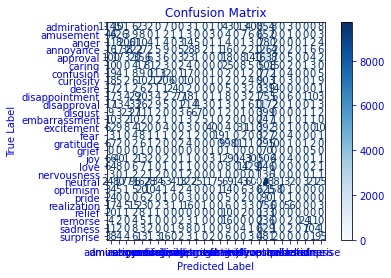

                precision    recall  f1-score   support

    admiration       0.55      0.53      0.54      2168
     amusement       0.64      0.36      0.46      1176
         anger       0.53      0.18      0.27      1120
     annoyance       0.37      0.13      0.20      1682
      approval       0.44      0.16      0.23      2234
        caring       0.52      0.12      0.19       690
     confusion       0.55      0.11      0.19       990
     curiosity       0.57      0.17      0.26      1197
        desire       0.65      0.06      0.10       422
disappointment       0.58      0.08      0.14       977
   disapproval       0.41      0.14      0.21      1521
       disgust       0.57      0.12      0.20       559
 embarrassment       0.38      0.02      0.03       295
    excitement       0.55      0.07      0.12       594
          fear       0.59      0.05      0.09       380
     gratitude       0.76      0.71      0.74      1405
         grief       0.00      0.00      0.00  

In [30]:
#Confusion matrix_BASE-MNB

#make predictions on test data
y_pred = base_mnb.predict(X_test)

#y_test=actual, y_pred=prediction
cm_mnb = confusion_matrix(y_test,y_pred)
print(cm_mnb)

#for plotting the matrix grid
color = 'blue'
matrix = plot_confusion_matrix(base_mnb, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

print(classification_report(y_test, y_pred))

In [27]:
#Confusion marix_BASE-DT
y_pred = dtc.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt)

print(classification_report(y_test, y_pred))

[[1778  592  908  493]
 [ 892 4645 1529  708]
 [1601 2526 5236 1704]
 [ 866 1318 2529 7039]]
              precision    recall  f1-score   support

   ambiguous       0.35      0.47      0.40      3771
    negative       0.51      0.60      0.55      7774
     neutral       0.51      0.47      0.49     11067
    positive       0.71      0.60      0.65     11752

    accuracy                           0.54     34364
   macro avg       0.52      0.54      0.52     34364
weighted avg       0.56      0.54      0.55     34364



In [43]:
#Confusion matrix_BASE-MLP
y_pred = p.predict(X_test)

cm_p = confusion_matrix(y_test, y_pred)
print(cm_p)

print(classification_report(y_test, y_pred))

[[ 856   26   16   61   68   13   15   18   15   26   27   18    2   76
     9   88    6  101  118    3  412   39   16   21    7    2   16   59]
 [  33  422   10   40   17    4    9    3   12   20   13   13    5   38
     4   17    6  160   21    2  310   14    3   11    2    2   15   27]
 [  17   17  206  140   22    6    9   11    2   39   33   57    4   15
     7    2    6   15    5    7  339    5    4   15    6    4   45   24]
 [  44   37   83  208   47   24   21   20    8   75   71   85   18   24
    12    9   11   43   16    8  615   20    4   32    8    6   82   57]
 [ 127   28   26   94  232   42   44   18   35   79   51   41    8   53
    13   39   12   99   60   12  879   55   12   48   13    8   50   48]
 [  26    7   13   23   24  106    5   10    5   10   11   10    3   10
     4   32    4   27   15   10  204   32    1   13    8    7   35   14]
 [  10   14   12   45   16    3  134   50   10   23   14   10    5   19
     4   11    3   27   20    8  443    6    1   20    4  

In [56]:
#Confusion matrix_TOP-MNB
y_pred = nb_grid.predict(X_test)

cm_Tmnb = confusion_matrix(y_test, y_pred)
print(cm_Tmnb)

print(classification_report(y_test, y_pred))


[[1091   29    5   16   53   11    2   15    3    1    8    0    0   11
     1   65    0   31   71    0  675   22    0    8    1    0    4   15]
 [  49  557    6   30   17    2    5    8    2    2   11    5    2    6
     0   10    0   22   13    1  466    3    0    6    0    0    4    9]
 [  10   12  190   96   15    7    5    9    0   17   26   21    0    3
     1    8    0    3    6    0  537    5    0    2    0    0    9    3]
 [  35   32   96  187   51   16   14   18    5   24   76   20    5    3
     1   16    0    4    9    1  993    3    0   10    0    0   16   16]
 [ 125   29   12   41  306   33   14   16    5   14   51    8    0   12
     3   25    0   11   27    0 1406   39    0   24    1    1   14    8]
 [  16    5    2   14   12   98    2    5    2    3   13    0    0    2
     0   23    0    6    2    1  440   27    0    2    0    2   12    1]
 [  12   13    6   20   24    4  123   63    0    1   24    0    0    4
     0    8    0    0    3    0  632    4    0   15    0  

In [28]:
#Confusion matrix_TOP-DT
y_pred = dt_grid.predict(X_test)

cm_Tdt = confusion_matrix(y_test, y_pred)
print(cm_Tdt)

print(classification_report(y_test, y_pred))

[[   19    19  3574   159]
 [    1   331  7070   372]
 [   10    42 10400   615]
 [    1    50  7867  3834]]
              precision    recall  f1-score   support

   ambiguous       0.61      0.01      0.01      3771
    negative       0.75      0.04      0.08      7774
     neutral       0.36      0.94      0.52     11067
    positive       0.77      0.33      0.46     11752

    accuracy                           0.42     34364
   macro avg       0.62      0.33      0.27     34364
weighted avg       0.62      0.42      0.34     34364



In [16]:
#Confusion matrix_TOP-MLP
y_pred = mlp_grid.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred)
print(cm_mlp)

print(classification_report(y_test, y_pred))

[[1147   26    8    0   10    4    1    2    4    1    6    1    0    3
     1   37    0   33   96    0  697   19    0    0    0    0    3   35]
 [  29  744    5    3    1    0    0    3    0    0    2    1    0    0
     0   11    0   23   16    0  376    3    0    0    0    1    1   14]
 [   6   13  241   10    1    0    2    1    1    1   13    6    0    0
     2    4    0    4    3    0  734    3    0    0    0    5    6    6]
 [  29   50  111   16    4    2    4    8    5    3   32   12    0    0
     0    7    0    4   15    0 1345   10    0    1    0    5    8   17]
 [ 133   36   10    3   87    9    3    3    7    3   22    3    0    0
     0   17    0   18   37    0 1794   22    0    2    0    2   10    5]
 [  28    5    3    0    1   32    2    3    2    0    8    1    0    0
     2   13    0   10   15    0  492   30    0    0    0   13    9    0]
 [  15   22   10    1    4    0   62   22    0    0   13    2    0    0
     0    9    0    6   10    0  773    1    0    3    0  